## Ridge and Lasso (Regularization)

im gonna apply ridge and lasso on california housing dataset

i'll use different alpha values and see how it changes things, versus how it is theoretically supposed to change things

i'll also check out how it shrinks the coefficients in case of ridge, and check if it makes it zero in case of lasso



In [9]:
from sklearn.datasets import fetch_california_housing

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [11]:
data = fetch_california_housing(as_frame=True)
df = data.frame

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
## ridge for different alpha values

alphas = [0.01, 0.1, 1, 10, 100, 1000]
train_r2_values = []
test_r2_values = []


for alpha in alphas:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=alpha))
    ])
    
    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)

    train_r2_values.append(train_r2)
    test_r2_values.append(test_r2)
    
    print(f"Alpha: {alpha}")
    print("Train R2:", train_r2)
    print("Test R2:", test_r2)

Alpha: 0.01
Train R2: 0.6125511913897304
Test R2: 0.5757879873121599
Alpha: 0.1
Train R2: 0.6125511907003128
Test R2: 0.5757905180002314
Alpha: 1
Train R2: 0.6125511218634558
Test R2: 0.5758157428913684
Alpha: 10
Train R2: 0.6125443416505998
Test R2: 0.5760599032848372
Alpha: 100
Train R2: 0.6119572763203154
Test R2: 0.5777912763033606
Alpha: 1000
Train R2: 0.5905279516392485
Test R2: 0.5681322035002805


In [28]:
## observations:

#1 as alpha increases train r2 decreases (as expected) and test r2 increases (as expected)
#2 but after some point (alpha=100) test r2 decreases, indicating over regularization, thus underfitting


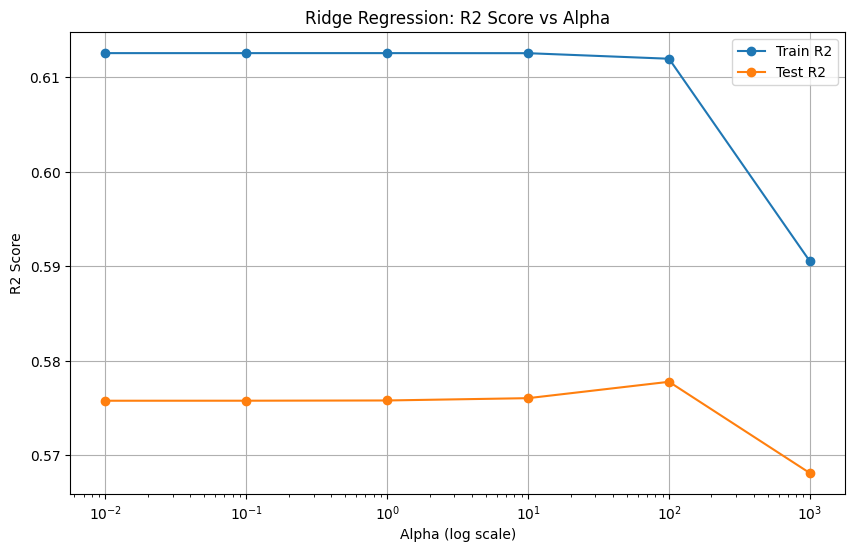

In [29]:
#plotting train r2, test r2 vs alha values

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_values, marker='o', label='Train R2')
plt.plot(alphas, test_r2_values, marker='o', label='Test R2')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R2 Score')
plt.title('Ridge Regression: R2 Score vs Alpha')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# checking coefficients shrinkage

# baseline LR coefficients for reference

# feature  coefficient
# 3         AveBedrms     0.783145
# 7         Longitude    -0.433708
# 6          Latitude    -0.419792
# 0            MedInc     0.224337
# 8  duplicate_income     0.224337
# 2          AveRooms    -0.123323
# 1          HouseAge     0.009724
# 5          AveOccup    -0.003526
# 4        Population    -0.000002

ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=10))
])

ridge.fit(X_train, y_train)

coef = ridge.named_steps["ridge"].coef_

pd.DataFrame({
    "feature": X.columns,
    "coef": coef
}).sort_values(by="coef", key=abs, ascending=False)

,feature,coef
6,Latitude,-0.889384
7,Longitude,-0.862199
0,MedInc,0.853814
3,AveBedrms,0.336750
2,AveRooms,-0.292412
1,HouseAge,0.123316
5,AveOccup,-0.040867
4,Population,-0.002055


In [34]:
## observations: on comparing with baseline LR coeffs, coeffs shrunk, but still less overfitting than baseline LR

In [38]:
## lasso for different alpha values

alphas = [0.0001, 0.001, 0.01, 0.1, 1]

train_r2_values = []
test_r2_values = [] 

for alpha in alphas:

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=alpha, max_iter=10000))
    ])

    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)

    train_r2_values.append(train_r2)
    test_r2_values.append(test_r2)

    print(f"Alpha: {alpha}")
    print("Train R2:", train_r2)
    print("Test R2:", test_r2)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")


Alpha: 0.0001
Train R2: 0.6125507734946509
Test R2: 0.5758995026632454
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Alpha: 0.001
Train R2: 0.6125094085909123
Test R2: 0.5768562568705682
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Alpha: 0.01
Train R2: 0.6084735081636228
Test R2: 0.5816154300698727
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Alpha: 0.1
Train R2: 0.4974185516409556
Test R2: 0.48136113250290735
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Alpha: 1
Train R2: 0.0
Test R2: -0.00021908714592466794
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [36]:
## observations:

#1 as alpha increases train r2 decreases (as expected) and test r2 increases (as expected)
#2 but after some point (alpha=1) test r2 decreases, indicating over regularization, thus underfitting

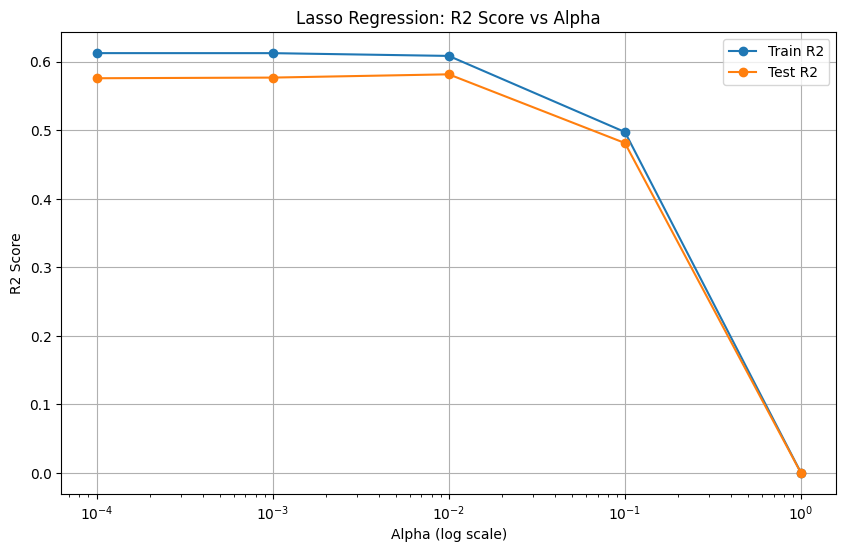

In [39]:
## plotting train r2, test r2 vs alpha values

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_values, marker='o', label='Train R2')
plt.plot(alphas, test_r2_values, marker='o', label='Test R2')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R2 Score')
plt.title('Lasso Regression: R2 Score vs Alpha')
plt.legend()
plt.grid()
plt.show()

In [40]:
## checking coefficients shrinkage

lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.1, max_iter=10000))
])
lasso.fit(X_train, y_train)
coef = lasso.named_steps["lasso"].coef_
pd.DataFrame({
    "feature": X.columns,
    "coef": coef
}).sort_values(by="coef", key=abs, ascending=False)


,feature,coef
0,MedInc,0.710598
1,HouseAge,0.106453
6,Latitude,-0.011469
2,AveRooms,-0.000000
3,AveBedrms,0.000000
4,Population,-0.000000
5,AveOccup,-0.000000
7,Longitude,-0.000000


In [41]:
## observations for coefficients: as expected, more coefficients are shrunk to zero in lasso than ridge, but still less overfitting than baseline LR

In [42]:
# questions:

# Why does Ridge fix multicollinearity?
# Ridge fixes multicollinearity by adding a penalty term to the loss function that shrinks the coefficients of correlated features,
# thus reducing their impact and stabilizing the model.


# Why does Lasso set coefficients to zero?
# Lasso sets coefficients to zero because it uses an L1 penalty, which encourages sparsity in the model. 
# When the penalty is strong enough, it can force some coefficients to become exactly zero, effectively performing feature selection.

# Why is scaling mandatory?
# Scaling is mandatory for Ridge and Lasso because the regularization terms are sensitive to the scale of the features. 
# If features are on different scales, the regularization may disproportionately penalize certain coefficients, leading to suboptimal performance.


# What happens if alpha is too high?
# If alpha is too high, it can lead to over-regularization, where the model becomes too simple and underfits the data,
# resulting in poor performance on both the training and test sets.


# Why does Ridge reduce variance?
# Ridge reduces variance by shrinking the coefficients, which can help to prevent overfitting. 
# By adding a penalty term to the loss function, Ridge discourages the model from fitting the noise in the training data, 
# thus improving its generalization to unseen data.


# When would you choose Lasso over Ridge?
# You would choose Lasso over Ridge when you want to perform feature selection, as Lasso can set some coefficients to zero,
# effectively removing those features from the model. 